Pick a dataset of your choice with a binary outcome and the potential for at least 15 features. If you're drawing a blank, the [crime rates in 2013 dataset](https://ucr.fbi.gov/crime-in-the-u.s/2013/crime-in-the-u.s.-2013/tables/table-8/table_8_offenses_known_to_law_enforcement_by_state_by_city_2013.xls/view) has a lot of variables that could be made into a modelable binary outcome.

Engineer your features, then create three models. Each model will be run on a training set and a test-set (or multiple test-sets, if you take a folds approach). The models should be:

* Vanilla logistic regression
* Ridge logistic regression
* Lasso logistic regression


In your report, evaluate all three models and decide on your best. Be clear about the decisions you made that led to these models (feature selection, regularization parameter selection, model evaluation criteria) and why you think that particular model is the best of the three. Also reflect on the strengths and limitations of regression as a modeling approach. Were there things you couldn't do but you wish you could have done?

In [0]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from scipy.stats import mstats
import statsmodels.api as sm

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore")

In [0]:
crime_path ='https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/New_York_offenses/NEW_YORK-Offenses_Known_to_Law_Enforcement_by_City_2013%20-%2013tbl8ny.csv'
crime_data = pd.read_csv(crime_path, skiprows=4, skipfooter=3, engine='python')

In [0]:
crime_data.head(5)

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,"1,861",0,0,nan,0,0,0,12,2,10,0,0.000
1,Addison Town and Village,"2,577",3,0,nan,0,0,3,24,3,20,1,0.000
2,Akron Village,"2,846",3,0,nan,0,0,3,16,1,15,0,0.000
3,Albany,"97,956",791,8,nan,30,227,526,"4,090",705,"3,243",142,nan
4,Albion Village,"6,388",23,0,nan,3,4,16,223,53,165,5,nan


In [0]:
def convert_number(number):
    try:
        converted = float(number.replace(',', ''))
    except:
        converted = number
    
    return converted

In [0]:
crime_data.columns = ['city', 'population', 'violent_crime', 'murder_manslaughter', 
'rape', 'robbery', 'assault', 'property_crime', 'burglary', 'larceny_theft', 
'vehicle_theft', 'arson', 'murder']

crime_data.fillna(0)
crime_data['population'] = crime_data['population'].apply(lambda x: convert_number(x))
crime_data['murder_manslaughter'] = crime_data['murder_manslaughter'].apply(lambda x: convert_number(x))
crime_data['robbery'] = crime_data['robbery'].apply(lambda x: convert_number(x))
crime_data['property_crime'] = crime_data['property_crime'].apply(lambda x: convert_number(x))
crime_data['larceny_theft'] = crime_data['larceny_theft'].apply(lambda x: convert_number(x))
crime_data['murder'] = crime_data['murder'].apply(lambda x: convert_number(x))

In [0]:
crime_data = crime_data.drop('rape', 1)

In [0]:
crime_data = crime_data.drop('city', 1)

In [0]:
crime_data['murder'] = crime_data['murder'].fillna(0)

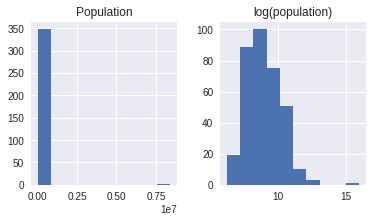

In [0]:
plt.rcParams['figure.figsize'] = (6.0, 3.0)
population = pd.DataFrame({"Population":crime_data["population"], "log(population)":np.log(crime_data["population"])})
population.hist(bins = 10)
crime_data['population'] = np.log(crime_data["population"])

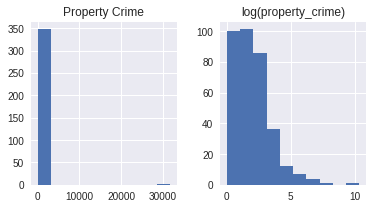

In [0]:
plt.rcParams['figure.figsize'] = (6.0, 3.0)
property_crime = pd.DataFrame({"Property Crime":crime_data["property_crime"], "log(property_crime)":np.log1p(crime_data["property_crime"])})
property_crime.hist(bins=10)
crime_data['property_crime'] = np.log1p(crime_data["property_crime"])

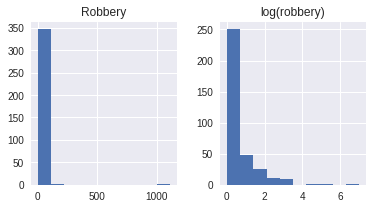

In [0]:
plt.rcParams['figure.figsize'] = (6.0, 3.0)
robbery = pd.DataFrame({"Robbery":crime_data["robbery"], "log(robbery)":np.log1p(crime_data["robbery"])})
robbery.hist(bins=10)
crime_data['robbery'] = np.log1p(crime_data["robbery"])

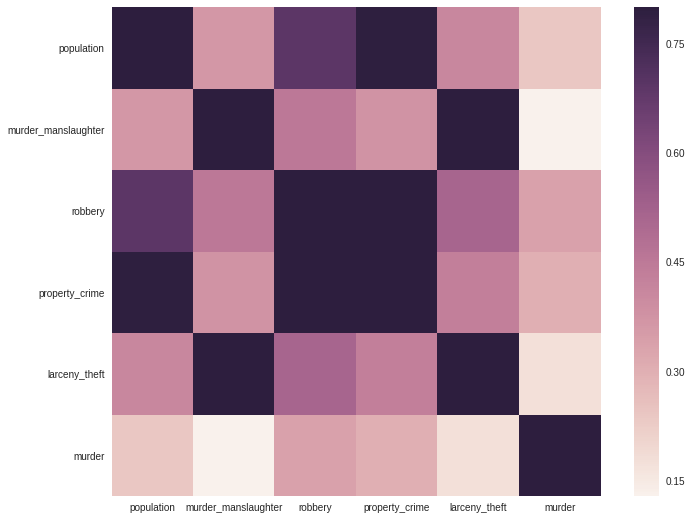

In [0]:
corrmat = crime_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.set_style('darkgrid')
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.81


In [0]:
#Cross Validation
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.849


In [0]:
#Define the training and test sizes
trainsize = int(crime_data.shape[0]*0.8)  
df_test = crime_data.iloc[trainsize:, :].copy() 
df_train = crime_data.iloc[:trainsize, :].copy()

#Set up regression model to predict defaults using all other variables as features
regr1 = linear_model.LinearRegression()
Y_train = df_train['murder'].values.reshape(-1, 1)
X_train = df_train[['population', 'robbery', 'property_crime', 'larceny_theft']]
regr1.fit(X_train, Y_train)
print('\nR-squared simple model:')
print(regr1.score(X_train, Y_train))

#Store the parameter estimates.
origparams = np.append(regr1.coef_, regr1.intercept_) 

# Make new features to capture potential quadratic and cubic relationships
# between the features.

df_train['population_robbery'] = df_train['population'] * df_train['robbery'] 
df_train['population_property_crime'] = df_train['population'] * df_train['property_crime']
df_train['population_larceny'] = df_train['population'] * df_train['larceny_theft'] 
df_train['larceny_robbery'] = df_train['larceny_theft'] * df_train['robbery']
df_train['property_crime_robbery'] = df_train['property_crime'] * df_train['robbery']
df_train['property_crime_larceny'] = df_train['property_crime'] * df_train['larceny_theft']
df_train['robbery_sqrt'] = df_train['robbery'] ** 0.5
df_train['robbery2'] = df_train['robbery'] ** 2
df_train['robbery3'] = df_train['robbery'] ** 3
df_train['larceny_sqrt'] = df_train['larceny_theft'] ** 0.5
df_train['larceny2'] = df_train['larceny_theft'] ** 2
df_train['larceny3'] = df_train['larceny_theft'] ** 3
df_train['population_sqrt'] = df_train['population'] ** 0.5
df_train['population2'] = df_train['population'] ** 2
df_train['population3'] = df_train['population'] ** 3

# Re-run the model with the new features.
regrBig = linear_model.LinearRegression()
X_train2 = df_train[['population', 'robbery', 'property_crime', 'larceny_theft',
                     'population_robbery', 'population_property_crime','population_larceny',
                     'larceny_robbery','property_crime_robbery','property_crime_larceny',
                     'robbery_sqrt','robbery2','robbery3','larceny_sqrt','larceny2',
                     'larceny3','population_sqrt','population2','population3']]
regrBig.fit(X_train2, Y_train)
print('\nR-squared complex model:')
print(regrBig.score(X_train2, Y_train))

# Store the new parameter estimates for the same features.
newparams = np.append(
    regrBig.coef_[0,0:(len(origparams)-1)],
    regrBig.intercept_)

print('\nParameter Estimates for the same predictors for the small model '
      'and large model:')
compare = np.column_stack((origparams, newparams))
prettycompare = np.array2string(
    compare,
    formatter={'float_kind':'{0:.3f}'.format})
print(prettycompare)


R-squared simple model:
0.09280630769069742

R-squared complex model:
0.691317744555738

Parameter Estimates for the same predictors for the small model and large model:
[[-0.156 -107.319]
 [2.117 22.822]
 [0.534 3.382]
 [-0.000 -0.686]
 [0.141 351.903]]


In [0]:
# Test the simpler model with smaller coefficients.
Y_test = df_test['murder'].values.reshape(-1, 1)
X_test = df_test[['population', 'robbery', 'property_crime', 'larceny_theft']]
print('\nR-squared simple model:')
print(regr1.score(X_test, Y_test))

df_test['population_robbery'] = df_test['population'] * df_test['robbery'] 
df_test['population_property_crime'] = df_test['population'] * df_test['property_crime']
df_test['population_larceny'] = df_test['population'] * df_test['larceny_theft'] 
df_test['larceny_robbery'] = df_test['larceny_theft'] * df_test['robbery']
df_test['property_crime_robbery'] = df_test['property_crime'] * df_test['robbery']
df_test['property_crime_larceny'] = df_test['property_crime'] * df_test['larceny_theft']
df_test['robbery_sqrt'] = df_test['robbery'] ** 0.5
df_test['robbery2'] = df_test['robbery'] ** 2
df_test['robbery3'] = df_test['robbery'] ** 3
df_test['larceny_sqrt'] = df_test['larceny_theft'] ** 0.5
df_test['larceny2'] = df_test['larceny_theft'] ** 2
df_test['larceny3'] = df_test['larceny_theft'] ** 3
df_test['population_sqrt'] = df_test['population'] ** 0.5
df_test['population2'] = df_test['population'] ** 2
df_test['population3'] = df_test['population'] ** 3

# Re-run the model with the new features.
X_test2 = df_test[['population', 'robbery', 'property_crime', 'larceny_theft',
                     'population_robbery', 'population_property_crime','population_larceny',
                     'larceny_robbery','property_crime_robbery','property_crime_larceny',
                     'robbery_sqrt','robbery2','robbery3','larceny_sqrt','larceny2',
                     'larceny3','population_sqrt','population2','population3']]
print('\nR-squared complex model:')
print(regrBig.score(X_test2, Y_test))


R-squared simple model:
0.23395771227250084

R-squared complex model:
0.0972744646068836


In [0]:
# Fitting a ridge regression model. 
ridgeregr = linear_model.Ridge(alpha=10, fit_intercept=False)
ridgeregr.fit(X_train, Y_train)
print(ridgeregr.score(X_train, Y_train))
origparams = ridgeregr.coef_[0]
print(origparams)

ridgeregrBig = linear_model.Ridge(alpha=10, fit_intercept=False)
ridgeregrBig.fit(X_train2, Y_train)
print(ridgeregrBig.score(X_train2, Y_train))
newparams = ridgeregrBig.coef_[0, 0:len(origparams)]
print('\nParameter Estimates for the same predictors for the small model and large model')
compare = np.column_stack((origparams, newparams))
prettycompare = np.array2string(compare,
                               formatter = {'float_kind':'{0:.3f}'.format})
print(prettycompare)

0.09260151376032133
[-1.41440512e-01  1.89132393e+00  6.11147080e-01 -1.15565058e-04]
0.6475119999668948

Parameter Estimates for the same predictors for the small model and large model
[[-0.141 -2.786]
 [1.891 1.857]
 [0.611 1.623]
 [-0.000 -0.282]]


In [0]:
#Print Predictive power
print(ridgeregr.score(X_test, Y_test))
print(ridgeregrBig.score(X_test2, Y_test))

0.2313240994319016
-0.1346169688826322


In [0]:
#Lasso Regressions
#Small number of parameters
lass = linear_model.Lasso(alpha=10)
lassfit = lass.fit(X_train, Y_train)
print('R² for the model with few features:')
print(lass.score(X_train, Y_train))
origparams = np.append(lassfit.coef_, lassfit.intercept_)
print('\nParameter estimates for the model with few features:')
print(origparams)

#Large number of parameters.
lassBig = linear_model.Lasso(alpha=10)
lassBig.fit(X_train2, Y_train)
print('\nR² for the model with many features:')
print(lassBig.score(X_train2, Y_train))
origparams = np.append(lassBig.coef_, lassBig.intercept_)
print('\nParameter estimates for the model with many features:')
print(origparams)

R² for the model with few features:
0.021401854584913615

Parameter estimates for the model with few features:
[0.         0.         0.         0.00114652 0.82139538]

R² for the model with many features:
0.3823629622267827

Parameter estimates for the model with many features:
[-0.00000000e+00 -0.00000000e+00 -0.00000000e+00  3.69064187e-02
 -0.00000000e+00 -0.00000000e+00 -4.28963646e-05 -3.65889527e-03
 -0.00000000e+00  5.12841188e-04 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -1.51854527e-06  3.59188325e-11
 -0.00000000e+00 -0.00000000e+00 -2.59406549e-03  1.02445200e+00]


In [0]:
#Print Predictive power
print(lass.score(X_test, Y_test))
print(lassBig.score(X_test2, Y_test))

0.06846407051722536
0.6805964541758176


Based on our accuracy scores, the vanilla regression is most accurate, followed by the Lasso Regression and Ridge Regression; respectively. However, because the model is increasingly complex and features likely correlate with one another, coefficients arrived at by our vanilla regression become increasingly large. This is a sign that the model is likely overfitting. 